In [63]:
import vtk
import numpy as np
import matplotlib.pyplot as plt
from vtk.util.numpy_support import vtk_to_numpy

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 18

In [38]:
reader = vtk.vtkXMLImageDataReader()
reader.SetFileName("/doses-nfs/sim/NIO_2021_04_02/output/npTotalDoses.vti")
reader.Update()
image = reader.GetOutput()

In [37]:
dim = image.GetDimensions()
dim

(110, 56, 54)

In [39]:
doses = vtk_to_numpy(image.GetPointData().GetScalars())

In [45]:
doses.shape

(332640,)

In [46]:
# we have to invert the dimensions as vtk keeps then in x,y,z order, and NumPy uses z,y,x
doses = np.reshape(doses, np.flip(dim))
doses.shape

(54, 56, 110)

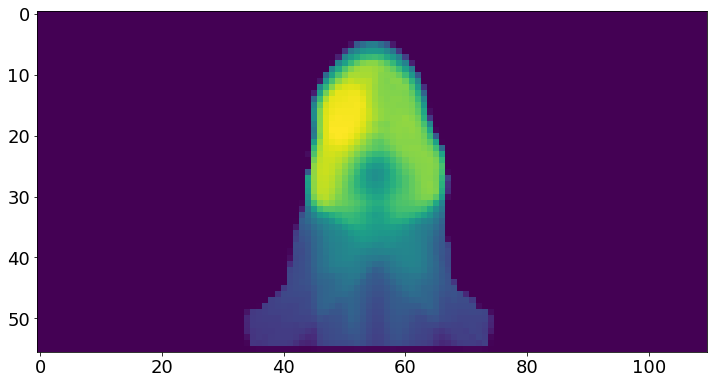

In [64]:
plt.imshow(doses[33,:,:])

In [56]:
reader = vtk.vtkXMLImageDataReader()
reader.SetFileName("/doses-nfs/sim/NIO_2021_04_02/output/mcFluenceDosesVMC.vti")
reader.Update()
mcimage = reader.GetOutput()
mcdoses = vtk_to_numpy(mcimage.GetPointData().GetScalars())
mcdoses = np.reshape(mcdoses, np.flip(dim))
mcdoses.shape

(54, 56, 110)

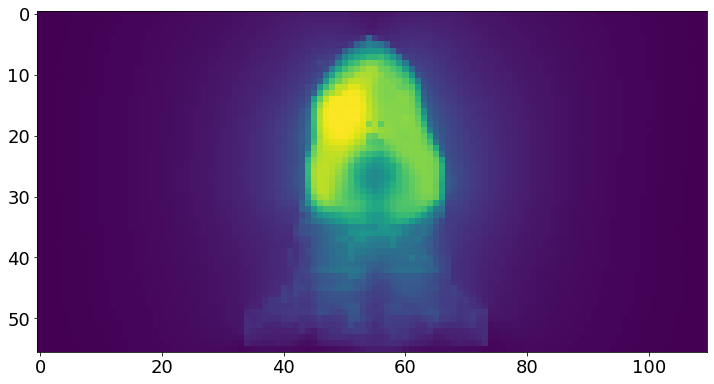

In [65]:
plt.imshow(mcdoses[33,:,:])

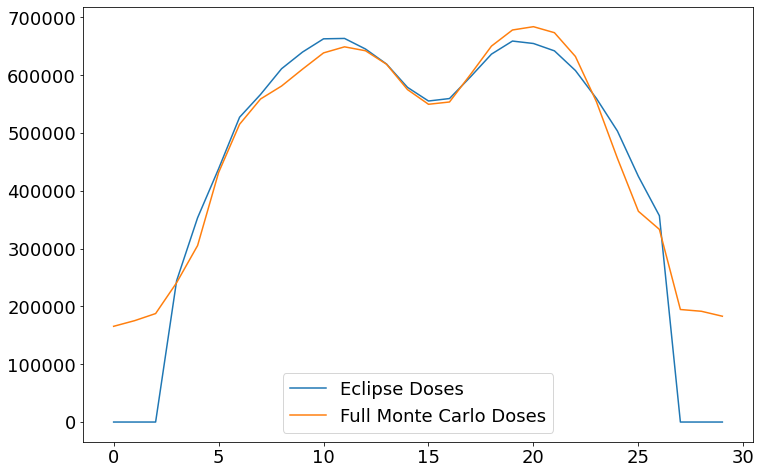

In [67]:
plt.plot(doses[33,33,40:70], label='Eclipse Doses')
plt.plot(mcdoses[33,33,40:70], label='Full Monte Carlo Doses')
plt.legend()

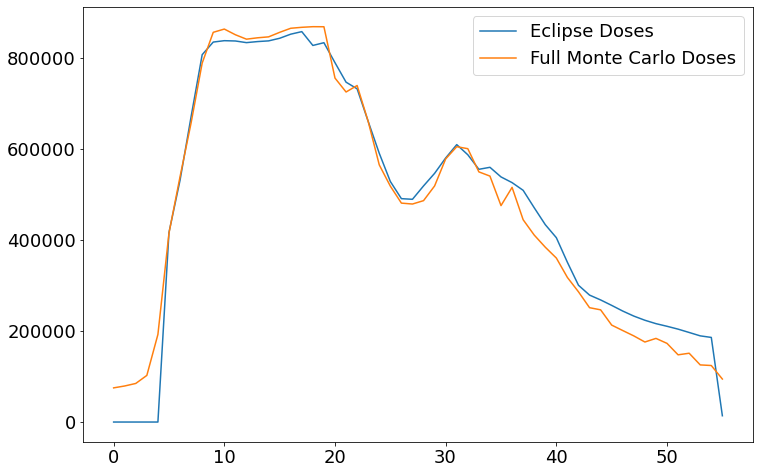

In [68]:
plt.plot(doses[33,:,55], label='Eclipse Doses')
plt.plot(mcdoses[33,:,55], label='Full Monte Carlo Doses')
plt.legend()